<a href="https://colab.research.google.com/github/fadiyahsutopo/Bangkit2023-PlanC/blob/machine-learning/keras_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import Dict, Text

import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input, Embedding, Flatten, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

In [ ]:
destination = pd.read_csv('planc_destinations.csv')

destination.head()

,place_id,city,place_name,types,rating,user_ratings_total,address,photos,lat,lng,coordinate,phone_number,description
0,1,Bali,Air Terjun Kanto Lampo,AirTerjun,4.5,1873,"Jl. Kaliasem, Beng, Kec. Gianyar, Kabupaten Gi...",NaN,-8.532147,115.331224,"{'lat':-8.5321467, 'lng':115.3312237}",8.155883e+10,Air Terjun Kanto Lampo merupakan salah satu ob...
1,2,Bali,Air Terjun Sekumpul,AirTerjun,3.9,363,"Bebetin, Kec. Sawan, Kabupaten Buleleng, Bali",NaN,-8.177531,115.182582,"{'lat':-8.1775308, 'lng':115.1825825}",NaN,Air Terjun Sekumpul merupakan salah satu air t...
2,3,Bali,Air Terjun Tukad Cepung,AirTerjun,4.6,1830,"Central parkir waterfall tukad cepung, Jl. Tem...",NaN,-8.441017,115.386808,"{'lat':-8.4410173, 'lng':115.3868079}",8.786322e+10,Air Terjun Tukad Cepung merupakan salah satu o...
3,4,Bali,Air Terjun Melanting,AirTerjun,4.6,288,"Jl. Air Terjun Melanting No.Desa, Gobleg, Kec....",NaN,-8.260884,115.062733,"{'lat':-8.2608842, 'lng':115.0627329}",NaN,Air Terjun Melanting merupakan air terjun yang...
4,5,Jawa Barat,Air Terjun Cikanteh,AirTerjun,4.7,828,"RG72+XMH, Ciwaru, Kec. Ciemas, Kabupaten Sukab...",NaN,-7.185060,106.501745,"{'lat':-7.1850597, 'lng':106.5017453}",NaN,Air Terjun Cikanteh merupakan air terjun yang ...


In [ ]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_id            287 non-null    int64  
 1   city                287 non-null    object 
 2   place_name          287 non-null    object 
 3   types               287 non-null    object 
 4   rating              287 non-null    float64
 5   user_ratings_total  287 non-null    int64  
 6   address             287 non-null    object 
 7   photos              70 non-null     object 
 8   lat                 287 non-null    float64
 9   lng                 287 non-null    float64
 10  coordinate          287 non-null    object 
 11  phone_number        17 non-null     float64
 12  description         19 non-null     object 
dtypes: float64(4), int64(2), object(7)
memory usage: 29.3+ KB


In [ ]:
rating = pd.read_csv('user_rating.csv')

rating.head()

,user_id,place_id,rating
0,1,32,5.0
1,1,33,4.8
2,2,29,4.6
3,2,15,4.8
4,3,16,4.7


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   400 non-null    int64  
 1   place_id  400 non-null    int64  
 2   rating    400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rating, test_size=0.2, random_state=42)

In [ ]:
# get unique users and destinations

n_users = len(rating.user_id.unique())
n_destination = len(rating.place_id.unique())

print(n_users)
print(n_destination)

200
287


In [ ]:
# initialize destination input layer
destination_input = Input(shape=[1], name="input_destination")
# create embedding for destination
destination_embed = Embedding(n_destination+1, 5, name="embedding_destination")(destination_input)
destination_vec = Flatten(name="destination_flatten")(destination_embed)
destination_vec = Dropout(0.2)(destination_vec)

# initialize user input layer
user_input = Input(shape=[1], name="input_user")
# create embedding for user
user_embed = Embedding(n_users+1, output_dim=5, name="embedding_user")(user_input)
user_vec = Flatten(name="user_flatten")(user_embed)
user_vec = Dropout(0.2)(user_vec)

In [ ]:
# Concatenate user and destination vectors
concat_layer = Concatenate()([destination_vec, user_vec])

# # Add dense layers
dense1 = Dense(256, activation='relu')(concat_layer)
# # dense1 = Dropout(0.2)(dense1)
dense2 = Dense(128, activation='relu')(dense1)
# dense2 = Dropout(0.2)(dense2)
dense3 = Dense(64, activation='relu')(dense2)

output = Dense(1)(dense3)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model = Model([user_input, destination_input], output)
model.compile(optimizer=adam_optimizer, loss=['mse'], metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_destination (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 input_user (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_destination (Embeddi  (None, 1, 5)        1440        ['input_destination[0][0]']      
 ng)                                                                                              
                                                                                                  
 embedding_user (Embedding)     (None, 1, 5)         1005        ['input_user[0][0]']       

In [ ]:
# history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20, verbose=1)

# history = model.fit([train.user_id, train.place_id], train.rating, epochs=20, verbose=1)
history = model.fit([train['user_id'], train['place_id']], train['rating'],
                    batch_size = 128,
                    epochs = 50,
                    verbose = 1,
                    validation_data=([test.user_id, test.place_id], test.rating))

Epoch 1/50
3/3 [==============================] - 2s 151ms/step - loss: 21.7173 - mean_squared_error: 21.7173 - val_loss: 21.1975 - val_mean_squared_error: 21.1975
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 21.0745 - mean_squared_error: 21.0745 - val_loss: 20.4146 - val_mean_squared_error: 20.4146
Epoch 3/50
3/3 [==============================] - 0s 34ms/step - loss: 20.1684 - mean_squared_error: 20.1684 - val_loss: 19.2879 - val_mean_squared_error: 19.2879
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 18.9089 - mean_squared_error: 18.9089 - val_loss: 17.7127 - val_mean_squared_error: 17.7127
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 17.1484 - mean_squared_error: 17.1484 - val_loss: 15.5619 - val_mean_squared_error: 15.5619
Epoch 6/50
3/3 [==============================] - 0s 38ms/step - loss: 14.7627 - mean_squared_error: 14.7627 - val_loss: 12.7410 - val_mean_squared_error: 12.7410
Epoch 7/50
3/3 [=====

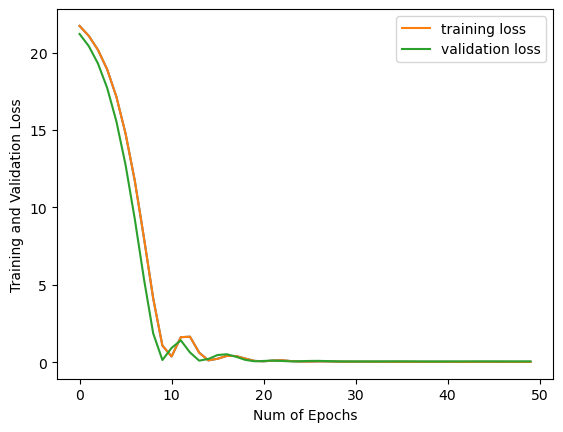

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.xlabel("Num of Epochs")
plt.ylabel("Training and Validation Loss")

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.legend()

In [ ]:
model.evaluate([test.user_id, test.place_id], test.rating)

3/3 [==============================] - 0s 6ms/step - loss: 0.0688 - mean_squared_error: 0.0688


[0.06876039505004883, 0.06876039505004883]

# Making recommendation

In [ ]:
destination_array = np.array(list(set(rating.place_id)))


# set user id
user_id = 12
user = np.array([user_id for i in range(len(destination_array))])

In [ ]:
predictions = model.predict([user, destination_array])
predictions = np.array([a[0] for a in predictions])
recommended_place_id = (-predictions).argsort()[:5]

print(recommended_place_id)
print(predictions[recommended_place_id])

9/9 [==============================] - 0s 3ms/step
[202 250  35  44   2]
[4.8493776 4.819098  4.785809  4.7743063 4.763389 ]


In [ ]:
print(destination[destination['place_id'].isin(recommended_place_id)])

     place_id             city                place_name      types  rating  \
1           2             Bali       Air Terjun Sekumpul  AirTerjun     3.9   
34         35    Sumatra Barat  Air Terjun Sarasah Bunta  AirTerjun     4.5   
43         44            Jambi         Candi Muaro Jambi      Candi     4.5   
201       202          Lampung      Pantai Sari Ringgung     Pantai     4.3   
249       250  Sumatra Selatan               Sungai Musi     Sungai     4.4   

     user_ratings_total                                            address  \
1                   363      Bebetin, Kec. Sawan, Kabupaten Buleleng, Bali   
34                 2070  Sarasah bunta.lembah harau, Kampuang sarosah, ...   
43                 1814  GMC8+RRP, Muaro Jambi, Kec. Maro Sebo, Kabupat...   
201                7652  Jl. Way Ratai No.KM. 14, Sidodadi, Teluk Panda...   
249                1147                                   Sumatera Selatan   

    photos       lat         lng                        

In [ ]:
model.save('keras_recommender')

INFO:tensorflow:Assets written to: keras_recommender\assets


INFO:tensorflow:Assets written to: keras_recommender\assets


In [ ]:
model.save('keras_recommender')